In [31]:
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
import numpy as np
import random
from SoccerWorld import player, game

In [44]:
def action(qtable, player_state, rand_rate, num_actions):
    if np.random.rand() < rand_rate:
        action = np.random.randint(0, num_actions)
    else:
        action = np.argmax(qtable[player_state, :])

    return action



def q_learning():
    
    errors = []
    qs = []
    #hyperparameters
    num_actions = 5
    num_rows = 2
    num_cols = 4
    num_states = num_rows * num_cols * 2 #2 is for possession
#     n = 1000000
    n = 1000000
    gamma = 0.9
    alpha = 0.3
    alpha_dec = 0.99
    rar = 0.5
    radr = 0.99
    rand_rate = rar
    qtableA = np.zeros(shape=(num_states, num_actions), dtype='float')
    qtableB = np.zeros(shape=(num_states, num_actions), dtype='float')
    verbose = False
    
    ind = []
    i = 0
    errors.append(0)
    qs.append(0)
    ind.append(0)
    while i < n:
        q = 0
        match = game(verbose=verbose, rows=2, columns=4, goalRstart=0, \
                     goalRend=1, aGoal=0, bGoal=3,aPosition=[0,2],\
                     bPosition=[0,1])
        
        initial_state = match.reset()
        
        state, score, done = match.move(4, 4)
        
        
        rand_rate *= radr
        
        if rand_rate < 0.01:
            rand_rate = 0.1

    
        
        while True:
            q += 1
            old_state = state
            pA_act = action(qtableA, state[0], rand_rate, num_actions)
            pB_act = action(qtableB, state[1], rand_rate, num_actions)

            state, score, done = match.move(pA_act, pB_act)

         
            if q > 100:
                break

            if done:
                qtableA[old_state[0], pA_act] = qtableA[old_state[0], pA_act] + alpha * (score[0] - qtableA[old_state[0], pA_act])
                qtableB[old_state[1], pB_act] = qtableB[old_state[1], pB_act] + alpha * (score[1] - qtableB[old_state[1], pB_act])                   
                break

            else:            
                qtableA[old_state[0], pA_act] = qtableA[old_state[0], pA_act] + alpha * (score[0] + gamma * (np.max(qtableA[state[0], :]) - qtableA[old_state[0], pA_act]))          
                qtableB[old_state[1], pB_act] = qtableB[old_state[1], pB_act] + alpha * (score[1] + gamma * (np.max(qtableB[state[1], :]) - qtableB[old_state[1], pB_act]))        
                if old_state[0] == 2 and pA_act == 1:
               
                    error = abs(qtableA[2, 1] - qs[-1]) 
                    qs.append(qtableA[2,1])
                    print (i, qtableA[2, 1], error)
#                     print (error)
                    errors.append(error)
                    ind.append(i)
                    if alpha < 0.001:
                        alpha = 0.001
                    alpha *= alpha_dec


            i += 1
    return errors, ind
        
        

In [45]:
errr, ind = q_learning()

4 0.0 0.0
22 0.0 0.0
61 7.780827680999997 7.780827680999997
64 11.961406094075496 4.180578413075499
72 14.223683678013922 2.2622775839384257
74 15.45654012462226 1.2328564466083378
76 18.707210644969887 3.2506705203476276
82 21.10731837575476 2.4001077307848746
87 22.88545962707975 1.778141251324989
103 44.719595188739234 21.834135561659483
109 33.79982311034588 10.91977207839335
114 26.792676261887827 7.007146848458056
115 41.94815990701143 15.155483645123603
116 36.74258560355085 5.20557430346058
124 31.935505434428833 4.807080169122017
125 26.459810012649477 5.475695421779356
128 24.11233501892336 2.3474749937261166
131 19.01556719748952 5.09676782143384
132 17.505017150789644 1.5105500466998762
147 29.485787487604536 11.980770336814892
151 26.329665054703256 3.156122432901281
158 26.174598597493777 0.15506645720947887
163 27.034862737588945 0.8602641400951683
167 21.777299765529488 5.257562972059457
169 24.098099280965037 2.3207995154355494
183 19.5619166949471 4.536182586017937
19

136980 43.559364611457454 0.1884634761350128
137144 43.742921193524666 0.1835565820672116
137205 43.921711269147394 0.17879007562272875
137287 44.09587158551861 0.1741603163712142
137589 44.26553497392015 0.16966338840153838
137798 44.43083110377344 0.16529612985329578
137827 44.591885561076296 0.1610544573028534
137845 44.74882025172364 0.156934690647347
137850 44.90175359943347 0.15293334770982625
137900 45.050800617211 0.1490470177775336
137950 45.196072980839126 0.14527236362812346
137994 45.33767910389749 0.1416061230583665
138094 45.47572421387037 0.13804510997287878
138163 45.61031042895498 0.13458621508461022
138188 45.74153683522872 0.13122640627373983
138203 45.86949956387537 0.1279627286466507
138277 45.99429186820795 0.12479230433257982
138317 46.11600426301605 0.12171239480809959
138353 46.23472446908473 0.11872020606868006
138389 46.350537557495706 0.11581308841097382
138453 46.463526076298535 0.11298851880282967
138553 46.57300930578274 0.10948322948420497
138678 46.6798

154955 45.62796803445669 0.016200464175064155
155355 45.64397333038947 0.01600529593277855
155360 45.65978613643607 0.01581280604659696
155403 45.67540908759023 0.0156229511541639
155508 45.69084477631995 0.015435688729716901
155695 45.69084477631995 0.0
155696 45.36254893305743 0.3282958432625165
155796 45.378190010834004 0.01564107777657142
155822 45.39364470513682 0.015454694302817984
155896 45.4089155327437 0.01527082760687648
155937 45.42400497048884 0.015089437745139378
156037 45.43891545601712 0.01491048552828289
156170 45.45364938851463 0.01473393249750643
156202 45.46820912942369 0.01455974090906409
156370 45.48259700314925 0.014387873725560496
156470 45.496815297749585 0.014218294600333081
156491 45.51086626560269 0.014050967853101781
156627 45.524752124067824 0.013885858465137346
156642 45.53847505612969 0.013722932061867255
156845 45.55203721102885 0.013562154899162238
156907 45.56544070488401 0.013403493855157933
156997 45.57868762129018 0.013246916406167486
157042 45.5917

171220 46.24289455827708 0.005929525989259332
171320 46.24881920223396 0.0059246439568809706
171420 46.25473896815135 0.005919765917390407
171464 46.2606538600189 0.005914891867547567
171508 46.2665638818228 0.0059100218038992125
171538 46.272469037546 0.005905155723205269
171616 46.278369331168236 0.005900293622232766
171900 46.284264766666 0.005895435497762946
171943 46.290155348012554 0.005890581346555734
172044 46.29604107917795 0.005885731165392372
172106 46.30192196412945 0.005880884951501741
172406 46.308243870565455 0.006321906436006941
172545 46.31411428044803 0.0058704098825757
172840 46.31997985706021 0.005865576612180234
172887 46.325840604354916 0.005860747294704538
172907 46.33169652628164 0.005855921926723795
173239 46.39063190695184 0.05893538067019932
173248 46.396430891884634 0.0057989849327952925
173348 46.402225105421316 0.005794213536681525
173446 46.40801455146103 0.005789446039713653
173546 46.41379923389975 0.005784682438722655
173746 46.419579156630526 0.005779

189533 47.064116462183 0.0006742044739596054
189731 47.06476725847496 0.0006507962919570787
189733 47.06539469381255 0.0006274353375914643
189861 47.06599880930834 0.0006041154957898698
190061 47.06657970960394 0.0005809002956027598
190291 47.11949482963604 0.05291512003209675
190465 47.11998267804079 0.0004878484047523557
190565 47.12044744543017 0.00046476738938139306
190633 47.120889172547265 0.00044172711709222767
190733 47.12130796363143 0.00041879108416509325
190833 47.12165887465095 0.0003509110195167864
190933 47.12198701078867 0.0003281361377247549
190964 47.122292412350866 0.00030540156219416303
191064 47.1225751830777 0.0002827707268338031
191164 47.122835363054875 0.00026017997717531216
191406 47.12307299231462 0.0002376292597432439
191606 47.12328811083575 0.00021511852113320629
191683 47.12345849925196 0.00017038841620831136
191734 47.12360655981812 0.00014806056616123442
191834 47.12373228560782 0.00012572578970093673
192134 47.123835716304086 0.0001034306962637288
19223

208274 46.81714796708474 0.004169938700911757
208333 46.812962594528905 0.004185372555838285
208351 46.808761883363104 0.004200711165800897
208433 46.80452684358842 0.004235039774684424
208474 46.800276631311476 0.004250212276943444
208492 46.79601123016839 0.004265401143086933
208548 46.79173073494357 0.004280495224818992
208571 46.78741644352453 0.004314291419042604
208674 46.783094472342206 0.004321971182321249
208699 46.77875758882131 0.004336883520899448
208710 46.77440572998828 0.004351858833025801
208810 46.770038925972095 0.004366804016186165
208875 46.765638546244375 0.004400379727719894
209083 46.76122337902133 0.004415167223044136
209283 46.756755980532326 0.0044673984890053475
209417 46.752273874120924 0.004482106411401787
209548 46.752273874120924 0.0
209565 46.60237182435513 0.14990204976579236
209668 46.59770330637883 0.004668517976298858
209699 46.645841704552105 0.048138398173271923
209805 46.64107928246504 0.00476242208706168
209941 46.63630281213795 0.004776470327094

226579 45.37306950391943 0.007906032279635156
226750 45.36515553464172 0.007913969277709043
226811 45.35723360139425 0.00792193324747359
226982 45.34930378943116 0.00792981196308773
227013 45.34135102366589 0.007952765765274705
227132 45.33339030687956 0.007960716786328703
227268 45.32542165955444 0.007968647325114375
227368 45.31744516699653 0.007976492557915549
227571 45.30946084951218 0.007984317484350356
227671 45.30146873432339 0.00799211518878451
227736 45.293453956493835 0.008014777829558284
227827 45.28540160172268 0.008052354771152181
227986 45.27734144975942 0.008060151963263706
228075 45.26927352089125 0.008067928868172203
228127 45.26119783537541 0.008075685515834152
228313 45.253114413439235 0.008083421936177615
228327 45.245023275280154 0.008091138159080913
228427 45.23692444106575 0.008098834214401052
228715 45.2288179309338 0.008106510131952405
228871 45.220703764992294 0.008114165941506712
228915 45.21258196331949 0.008121801672807294
229020 45.20445254596394 0.0081294

245215 43.28099374431832 0.015962848939651053
245430 43.265017717376374 0.01597602694194933
245526 43.27397740998182 0.008959692605444047
245726 43.25796548496969 0.01601192501212978
245826 43.24195386962073 0.01601161534895823
245870 43.22594053288021 0.016013336740520856
245907 43.20993123571502 0.016009297165190617
245988 43.1937992897647 0.016131945950320414
246045 43.17773972056193 0.016059569202766966
246145 43.16171034928637 0.01602937127555748
246345 43.14566088544107 0.016049463845305922
246545 43.129593607751445 0.016067277689622017
246695 43.11351124463969 0.016082363111756592
246745 43.097464508752175 0.01604673588751382
246774 43.08131369651569 0.01615081223648218
246874 43.06518129511329 0.016132401402401797
247074 43.049041498245664 0.0161397968676269
247153 43.0329066929583 0.016134805287364884
247453 43.0167628903 0.01614380265829851
247454 43.00069970423784 0.01606318606216206
247554 42.98462614930476 0.016073554933079492
247654 42.96854431947137 0.01608182983338935
2

258484 40.711704375826685 0.01440979499920303
258579 40.69730773814361 0.014396637683077529
258706 40.68292404746697 0.014383690676638139
258963 40.668556049076024 0.014367998390945047
259061 40.65426858640207 0.014287462673955531
259108 40.63999370937684 0.01427487702522967
259208 40.62573126816786 0.01426244120897735
259508 40.61148140749148 0.014249860676379456
259599 40.59724488739371 0.014236520097774985
259717 40.58301701945712 0.014227867936590144
259999 40.56880046138084 0.014216558076277863
260056 40.554661570787275 0.014138890593564213
260165 40.54060125686579 0.014060313921483214
260670 40.526545361869914 0.014055894995877338
261129 40.51250060507845 0.014044756791463442
261171 40.49846643446694 0.014034170611509467
261371 40.484442542605485 0.014023891861455695
261396 40.470430225918 0.014012316687484372
261458 40.45632001666489 0.01411020925311135
261505 40.44222273789041 0.014097278774478639
261605 40.42813831988755 0.014084418002859422
261901 40.41408964465442 0.01404867

277047 37.729477667969505 0.01185395370809772
277145 37.71754326875065 0.011934399218851865
277196 37.705649594550664 0.01189367419998888
277235 37.69377618779873 0.01187340675193127
277296 37.681916844291365 0.011859343507367726
277387 37.67014943605706 0.011767408234305776
277416 37.65841682649937 0.011732609557689955
277573 37.64676874345595 0.011648083043418467
277591 37.635134011483544 0.011634731972407053
277597 37.62351038261368 0.011623628869863012
277637 37.61189930437402 0.011611078239660344
277648 37.60036699811481 0.011532306259212532
277680 37.58873920100771 0.011627797107095716
277780 37.57713028494026 0.011608916067451958
277797 37.56553254806404 0.01159773687621879
277810 37.553947636128925 0.011584911935116793
277828 37.54244208772392 0.011505548405004618
277914 37.53094804108968 0.011494046634240362
277955 37.51935652092411 0.011591520165566749
277979 37.50777630511187 0.011580215812244887
278028 37.49621234756274 0.011563957549128645
278138 37.48466045359612 0.011551

294371 35.500787552164 0.009670521745455574
294578 35.4910151864721 0.009772365691901541
294678 35.48124829428924 0.009766892182859976
294706 35.47148923121166 0.009759063077574126
294715 35.46162870006256 0.009860531149101348
294868 35.45177431590603 0.009854384156533058
294872 35.44192865573798 0.009845660168046777
294880 35.43198186656489 0.00994678917309244
294995 35.422044231748906 0.009937634815983643
294997 35.412115395070316 0.009928836678589903
295166 35.402085889726955 0.010029505343361222
295188 35.3920664196907 0.01001947003625503
295231 35.382055878258434 0.01001054143226554
295378 35.3720562084688 0.009999669789635846
295443 35.36206886880012 0.009987339668676043
295558 35.35209346812881 0.009975400671315526
295643 35.34220014623209 0.009893321896718987
295743 35.33232025350009 0.009879892731994744
295834 35.322452900941606 0.009867352558487141
295943 35.312594665625895 0.009858235315711283
296131 35.302813772313584 0.009780893312310468
296177 35.29293231489761 0.00988145

312394 33.43503621310448 0.009035410803974742
312487 33.42600950734517 0.009026705759310971
312588 33.417014715122356 0.008994792222814851
312684 33.408027215209515 0.008987499912841201
312784 33.39904701644362 0.008980198765897285
312884 33.39007419677613 0.008972819667484089
312944 33.38110901315854 0.008965183617590355
312976 33.37217540729534 0.008933605863205685
313037 33.363313578238085 0.008861829057252635
313053 33.35445836896516 0.008855209272923048
313134 33.34560405540993 0.008854313555232807
313253 33.336646395738526 0.008957659671402496
313349 33.32768960609352 0.008956789645004903
313449 33.31872889819644 0.008960707897081477
313549 33.30980107974007 0.008927818456371028
313649 33.30087730536494 0.008923774375126925
313749 33.29195117414433 0.008926131220611921
313773 33.2830306060296 0.008920568114731964
313873 33.274111823978785 0.008918782050812979
313909 33.26520232673422 0.008909497244566467
314043 33.25629699160487 0.008905335129348657
314143 33.2473974488744 0.0088

330739 31.7917521217882 0.008650333166453805
330939 31.783109832747975 0.008642289040224682
331239 31.774481532246053 0.00862830050192187
331516 31.765866681805615 0.008614850440437749
331539 31.757260733024882 0.008605948780733286
331739 31.74866762983768 0.008593103187202189
331853 31.740082887167436 0.008584742670244339
331953 31.73151335772625 0.008569529441185608
332053 31.72295853676304 0.008554820963208698
332061 31.714411877698957 0.008546659064084139
332500 31.705885774237444 0.008526103461512946
332634 31.69736918598252 0.008516588254924073
332942 31.68886749440943 0.008501691573091108
333042 31.68038087638328 0.008486618026150694
333291 31.67192841636577 0.008452460017508656
333600 31.66348927803463 0.008439138331141294
333700 31.65506667367073 0.00842260436389708
333830 31.64665617950573 0.008410494165001836
333854 31.638253804809825 0.008402374695904768
333931 31.62977637851344 0.008477426296384039
333959 31.621308586962073 0.008467791551368009
334021 31.680484652413217 0.

348539 30.115578191340674 0.007160747068574835
348543 30.108423150190408 0.007155041150266328
348565 30.101271756285545 0.007151393904862857
348577 30.094125901067425 0.007145855218119834
348579 30.086986412806304 0.007139488261120874
348604 30.079920985032313 0.0070654277739912175
348626 30.072858944027395 0.007062041004918029
348639 30.065869728724852 0.006989215302542817
348657 30.05888344180276 0.006986286922092688
348743 30.051902706824183 0.0069807349785762085
348774 30.04499018734218 0.006912519482003887
348803 30.03807859470826 0.006911592633919383
348812 30.031172168736372 0.006906425971887842
348829 30.024271423814806 0.006900744921566115
348835 30.01737559782522 0.006895825989584381
348846 30.0105567585806 0.0068188392446231205
348929 30.003807982703236 0.006748775877362334
348973 29.997122078909527 0.006685903793709258
348982 29.990440815087467 0.006681263822059691
349025 29.983781694908156 0.006659120179310918
349052 29.977151369447956 0.006630325460200481
349157 29.970593

366130 28.507561348420964 0.005955673064200084
366135 28.50161071131093 0.0059506371100326305
366151 28.49566486471975 0.0059458465911816916
366223 28.489723739070897 0.005941125648853074
366365 28.483678950699762 0.006044788371134757
366513 28.47763819417106 0.0060407565287015075
366518 28.471671560566815 0.00596663360424543
366556 28.465711114368283 0.00596044619853231
366893 28.45975206675168 0.0059590476166029305
366930 28.45386477971261 0.005887287039069378
367089 28.44804536533194 0.0058194143806709064
367096 28.442230359524864 0.005815005807075835
367196 28.436420276967976 0.005810082556887863
367384 28.43060453655801 0.005815740409964576
367395 28.424792424511963 0.005812112046047702
367414 28.41887795769672 0.005914466815244879
367505 28.483787668901094 0.0649097112043755
367654 28.477901375029184 0.005886293871910198
367737 28.47204251459843 0.005858860430752344
368031 28.466186562886364 0.005855951712067764
368155 28.46033270104559 0.005853861840773078
368225 28.454482096289

383969 27.250028620178078 0.005226417232954361
384001 27.24470196872085 0.005326651457227882
384278 27.23938682930463 0.005315139416218528
384378 27.234087695362764 0.005299133941868206
384556 27.22880407847511 0.0052836168876524425
384634 27.223527465869964 0.005276612605147335
384656 27.218255967837482 0.005271498032481503
384662 27.21298938779845 0.005266580039030799
384911 27.20773155460029 0.005257833198161421
384958 27.20237372162796 0.0053578329723293905
385191 27.197021244415424 0.0053524772125363995
385291 27.191682790598684 0.005338453816740696
385391 27.18635724139731 0.005325549201373292
385451 27.18104103259919 0.00531620879812067
385587 27.1758026710569 0.005238361542289738
385633 27.17046516601069 0.0053375050462101115
385663 27.16513570277649 0.005329463234200915
385794 27.159842326336012 0.0052933764404770045
385867 27.154555047920446 0.005287278415565311
385989 27.149167715114434 0.005387332806012779
386104 27.143680204265156 0.00548751084927801
386253 27.138216826637

403508 26.340114889565545 0.005073362239421897
403608 26.335051728236305 0.005063161329239563
403874 26.329891847574984 0.0051598806613206705
404074 26.324745607679965 0.005146239895019278
404174 26.319612593131243 0.005133014548722059
404388 26.314492062350567 0.005120530780676091
404470 26.30938193882242 0.005110123528147881
404488 26.30427762704969 0.0051043117727296305
404588 26.29918437831109 0.005093248738599954
404843 26.29399526242739 0.005189115883698747
404943 26.288820696762837 0.005174565664553654
405012 26.283657142997104 0.0051635537657332975
405016 26.27849867938845 0.005158463608655239
405064 26.27342126068 0.005077418708449244
405065 26.26841842159524 0.005002839084760069
405075 26.263420719660807 0.004997701934431831
405119 26.258453936049023 0.00496678361178482
405149 26.253387123489816 0.005066812559206824
405157 26.2483248254606 0.005062298029216095
405203 26.243276309914748 0.005048515545851728
405213 26.23823340991191 0.005042900002838024
405231 26.23322198950931

420776 25.45704126928876 0.004259652466593877
420844 25.45278324880455 0.0042580204842082026
420896 25.448552716866462 0.004230531938087978
420920 25.444350345546173 0.004202371320289444
420927 25.440221068107103 0.004129277439069767
420958 25.436120119278687 0.004100948828416051
421004 25.43201844204228 0.004101677236405976
421015 25.427918979326595 0.004099462715686286
421059 25.423821739391382 0.004097239935212826
421061 25.41972769929741 0.004094040093971074
421073 25.41563537524657 0.004092324050841256
421153 25.411535826626626 0.0040995486199442155
421194 25.40746493453421 0.004070892092414624
421319 25.40346353211412 0.004001402420090727
421373 25.399489216472176 0.0039743156419440595
421378 25.3955873031016 0.0039019133705764375
421389 25.391714390868785 0.00387291223281494
421495 25.38783217219973 0.0038822186690552485
421513 25.38397892606392 0.003853246135808064
421540 25.380017323283898 0.003961602780023554
421575 25.376079930711047 0.003937392572851195
421598 25.3721449408

436323 24.935816704101235 0.004421773255540273
436444 24.931394839190606 0.004421864910629125
436490 24.926971278302478 0.004423560888128009
436544 24.92254453916655 0.004426739135926283
436561 24.918148079171853 0.004396459994698176
436565 24.913754909868988 0.004393169302865374
436629 24.909364907640185 0.004390002228802814
436736 24.90487229417671 0.0044926134634764026
436799 24.900383436681622 0.004488857495086762
436865 24.895894263663312 0.004489173018310311
436906 24.891406483508433 0.004487780154878607
436996 24.88694688363629 0.0044595998721419505
436998 24.882491257267635 0.0044556263686565956
437108 24.87803883695286 0.004452420314773775
437143 24.873588261296224 0.004450575656637312
437181 24.869140795678643 0.004447465617580804
437189 24.86469690253845 0.004443893140191335
437289 24.860256900684764 0.004440001853687647
437301 24.85582079215338 0.004436108531383098
437305 24.851388741263875 0.00443205088950549
437370 24.846962235771347 0.004426505492528321
437434 24.8425401

453024 24.144460916233548 0.004781320353600904
453094 24.139709960219303 0.0047509560142451335
453128 24.134990213511394 0.004719746707909422
453236 24.13016966260711 0.00482055090428446
453390 24.125353429110923 0.004816233496185873
453492 24.12054371801623 0.00480971109469408
453510 24.11573899142938 0.0048047265868476075
453633 24.110833903639982 0.004905087789399687
453659 24.105934082296187 0.004899821343794741
453687 24.10104092133264 0.004893160963547416
453743 24.096156552949417 0.004884368383223148
453853 24.091349807474987 0.004806745474429164
454086 24.0866204374714 0.004729370003587974
454134 24.081896035991605 0.004724401479794693
454150 24.077176606721945 0.004719429269659514
454238 24.07246141801103 0.004715188710914475
454361 24.06764565133337 0.004815766677662481
454496 24.062864209731192 0.004781441602176528
454533 24.058087741188313 0.004776468542878831
454615 24.05331886439429 0.004768876794024379
454732 24.048570538539884 0.004748325854404101
454735 24.043826508385

470748 23.098732172807143 0.004804008328679998
471000 23.094004397061948 0.0047277757451951175
471036 23.089278574009608 0.004725823052339706
471063 23.116032428860596 0.02675385485098758
471132 23.111364873749938 0.004667555110657418
471156 23.10669866339214 0.00466621035779724
471240 23.102025843003627 0.004672820388513799
471292 23.097355123192457 0.004670719811169732
471339 23.092583074105267 0.004772049087190311
471403 23.087716938962703 0.004866135142563621
471437 23.08285394166179 0.004862997300914884
471537 23.077995065739387 0.004858875922401751
471616 23.07314044014083 0.00485462559855776
471637 23.068186981369863 0.0049534587709665345
471737 23.063270353078355 0.004916628291507408
471989 23.0583611431133 0.004909209965056505
472024 23.053456648925106 0.004904494188192388
472053 23.048453122323302 0.0050035266018042535
472153 23.04345461638074 0.004998505942563014
472514 23.038467004552544 0.004987611828195071
472529 23.033557531145682 0.004909473406861764
472605 23.028727299

483730 22.26514156847266 0.004577622750822741
483770 22.260571492222194 0.00457007625046657
483809 22.256009887225034 0.004561604997160629
483909 22.251497725447372 0.004512161777661561
484009 22.2470007927297 0.004496932717671598
484142 22.242537113925156 0.0044636788045444575
484231 22.23808519280165 0.004451921123507674
484266 22.2337131173107 0.004372075490948646
484324 22.22924310683562 0.004470010475078112
484456 22.224809001241677 0.004434105593944082
484508 22.22038136780141 0.004427633440268863
484615 22.21603135770685 0.0043500100945585984
484633 22.211686530972322 0.004344826734527629
484733 22.20734872935541 0.004337801616912884
484783 22.20301630411505 0.004332425240360038
484937 22.198687742539224 0.004328561575825063
484940 22.19425949830615 0.004428244233075418
484968 22.189835992291325 0.004423506014823886
485033 22.185418245282374 0.004417747008950812
485165 22.181004605116076 0.004413640166298194
485211 22.176492711047494 0.004511894068581768
485259 22.17198828511235

502139 21.511320629971614 0.003773612365176149
502161 21.507548863510376 0.003771766461238002
502179 21.50377911586967 0.003769747640706811
502279 21.500005645847477 0.0037734700221925266
502379 21.49622905488685 0.003776590960626436
502879 21.49245012077372 0.0037789341131286847
502933 21.48867176864086 0.0037783521328620395
503153 21.48489432812362 0.0037774405172399383
503348 21.481116408151582 0.00377791997203758
503367 21.477237561530142 0.003878846621439891
503395 21.473258802214282 0.003978759315860003
503416 21.469181246564997 0.004077555649285358
503675 21.46511203475052 0.00406921181447828
503821 21.461048004108967 0.004064030641551142
503916 21.457066531680717 0.003981472428250754
504037 21.452987379465046 0.004079152215670234
504082 21.448813210808144 0.004174168656902566
504207 21.444656383778124 0.0041568270300196275
504334 21.440506682315757 0.004149701462367261
504409 21.436394618320403 0.0041120639953540206
504434 21.432295198786477 0.0040994195339258965
504563 21.4282

521024 20.653071548809056 0.003549856628094261
521140 20.64952897593284 0.003542572876217065
521190 20.646067499370456 0.0034614765623821597
521251 20.642506287285556 0.0035612120849002338
521270 20.639024170925204 0.0034821163603524496
521342 20.635546935669588 0.0034772352556160513
521348 20.632073241234263 0.003473694435324859
521412 20.6285001100003 0.0035731312339635224
521443 20.624940842706668 0.0035592672936317626
521449 20.621282462423224 0.003658380283443563
521512 20.617529950299392 0.003752512123831764
521527 20.61378406632312 0.0037458839762720686
521556 20.610045968493 0.003738097830119358
521560 20.606311476209207 0.0037344922837938554
521756 20.602583033581983 0.003728442627224382
521814 20.598886915816195 0.003696117765787932
521878 20.673733828419724 0.0748469126035296
522009 20.669990803968407 0.003743024451317467
522059 20.66628304825283 0.0037077557155775764
522187 20.66247654774271 0.003806500510119548
522209 20.658676730880504 0.0037998168622053186
522278 20.6549

539344 20.060032630338583 0.0031903287545098635
539613 20.056842343382684 0.0031902869558990687
539855 20.05365363458164 0.003188708801044271
539861 20.050467348453143 0.003186286128496363
539969 20.047357575601517 0.003109772851626502
540061 20.044250299239074 0.003107276362442235
540082 20.041143930743907 0.003106368495167544
540103 20.038038295463792 0.003105635280114427
540121 20.03493309743598 0.0031051980278107294
540189 20.031895016044786 0.0030380813911961013
540243 20.02885072405652 0.0030442919882638364
540271 20.025805594277593 0.003045129778929123
540295 20.022759115579813 0.00304647869777952
540380 20.019603299382315 0.0031558161974984955
540391 20.01634596469611 0.0032573346862037056
540425 20.013089973926604 0.003255990769506667
540456 20.009834183256004 0.0032557906706003337
540541 20.00665188511835 0.0031822981376521398
540593 20.003470678825696 0.003181206292655503
540728 20.000283778069097 0.0031869007565994423
540793 19.99709453124869 0.0031892468204084423
540811 19

558829 19.50064223979294 0.0036175711708992253
558944 19.497014748691047 0.0036274911018914224
559175 19.493388833328034 0.0036259153630133767
559300 19.48975979176182 0.0036290415662136866
559482 19.486028995162634 0.0037307965991857373
559736 19.482295255855725 0.003733739306909456
559798 19.478561384193334 0.0037338716623906976
559836 19.47482866815431 0.003732716039024808
559946 19.471098718202256 0.003729949952052891
560182 19.46744606520742 0.003652652994837524
560282 19.463791399645828 0.0036546655615907753
560294 19.460139388777975 0.0036520108678530505
560350 19.45648542948537 0.003653959292606146
560450 19.452859397868167 0.0036260316172018747
560650 19.449230282716783 0.003629115151383644
560825 19.44549807726077 0.0037322054560142703
560855 19.44176889337767 0.003729183883098841
560925 19.438042325158467 0.0037265682192035854
561125 19.43431850720611 0.003723817952355546
561280 19.43059836012914 0.0037201470769723244
561352 19.426780086009174 0.0038182741199648262
561452 19

577590 18.86075170728501 0.003125901110600182
577632 18.857628870714198 0.003122836570813803
577732 18.85450985175402 0.0031190189601773
577795 18.851393956279452 0.0031158954745684753
577895 18.848281247384044 0.003112708895407934
577944 18.84517172186296 0.003109525521082901
577969 18.84206544948239 0.003106272380570374
577980 18.838962492959546 0.0031029565228450906
577998 18.86936468969465 0.03040219673510336
578039 18.866238023209718 0.0031266664849312065
578049 18.863114142584624 0.0031238806250932782
578210 18.859994883041313 0.003119259543311159
578264 18.85687908015004 0.0031158028912727787
578269 18.73620258561426 0.120676494535779
578345 18.733198291735032 0.0030042938792291807
578461 18.730197200931066 0.0030010908039663775
578595 18.727199375877248 0.0029978250538178486
578645 18.7242048790689 0.0029944968083484014
578698 18.72121418040648 0.002990698662419078
578733 18.71822662616528 0.002987554241201451
578808 18.71524227915743 0.0029843470078496637
578823 18.71226120869

595566 18.362910606917804 0.0033011573026016094
595666 18.359649439394005 0.0032611675237994575
595750 18.356404590483603 0.0032448489104019984
595795 18.353166837268866 0.0032377532147371824
595889 18.349964252674575 0.0032025845942911246
595953 18.346772184100555 0.0031920685740196575
595958 18.34365829231112 0.0031138917894359963
595966 18.340547504984837 0.003110787326281894
595982 18.33744067430224 0.003106830682597206
596004 18.33433725217578 0.003103422126461197
596088 18.331252572601528 0.003084679574250515
596103 18.328247714161737 0.003004858439791036
596132 18.325145196968112 0.0031025171936249762
596134 18.322045444117308 0.003099752850804549
596164 18.318960075354138 0.0030853687631697824
596232 18.315886733602472 0.003073341751665737
596282 18.312817759234203 0.0030689743682685844
596417 18.30979453863207 0.0030232206021345576
596437 18.30677646153389 0.0030180770981793614
596492 18.303844275459447 0.0029321860744424555
596592 18.30091984514587 0.00292443031357692
596721 

610087 17.973340847953903 0.0023315481710994845
610247 17.97101050892154 0.0023303390323619055
610269 17.96868200544927 0.0023285034722704268
610281 17.966355468686757 0.002326536762513598
610545 17.96402584122919 0.0023296274575663745
610747 17.961698186431068 0.0023276547981225804
610858 17.95927034266822 0.0024278437628488803
610875 17.95691934050812 0.002351002160100535
610945 17.954575425127285 0.002343915380834005
611015 17.95230777796903 0.00226764715825567
611064 17.950040041168364 0.0022677368006647214
611145 17.947660657129916 0.0023793840384485065
611153 17.945282760648055 0.0023778964818603754
611200 17.942976981019243 0.002305779628812843
611294 17.940670858946586 0.002306122072656791
611302 17.93836620047442 0.00230465847216621
611418 17.936062228326673 0.0023039721477466912
611425 17.933767700589915 0.0022945277367583117
611581 17.931549078992276 0.002218621597638304
611734 17.929325942922105 0.0022231360701709946
611845 17.927001699687235 0.002324243234870238
611855 17.

628785 17.882544271119688 0.0021641136813066453
628851 17.880381434083787 0.002162837035900367
628940 17.878211951459992 0.00216948262379546
628955 17.875939783748006 0.0022721677119861283
628965 17.87366842516295 0.0022713585850553386
629092 17.871469893027026 0.00219853213592458
629135 17.86926619876282 0.002203694264206746
629192 17.867054915641553 0.00221128312126595
629292 17.86484067824452 0.002214237397033969
629350 17.86262029292627 0.0022203853182496402
629379 17.86047290358469 0.002147389341580208
629533 17.858327379753977 0.002145523830712648
629661 17.85617667052752 0.0021507092264556604
629756 17.8540263869959 0.0021502835316198343
629834 17.851865920757785 0.0021604662381164985
630037 17.84970706345356 0.002158857304223716
630423 17.847548557907572 0.0021585055459887315
630656 17.84537729138225 0.00217126652532329
630702 17.84320149118051 0.0021758002017406852
630760 17.841055986854425 0.002145504326083625
630860 17.83889444150624 0.00216154534818358
630894 17.83672917124

642751 17.582801366698448 0.001904000541575357
642805 17.580899374639724 0.001901992058723323
642905 17.578999455140547 0.0018999194991771162
643094 17.576999769628575 0.00199968551197216
643103 17.575002292053448 0.001997477575127249
643203 17.573007020068136 0.0019952719853115752
643394 17.57101395132804 0.001993068740095083
643403 17.569023083490986 0.0019908678370548216
643603 17.56703441421722 0.00198866927376784
643628 17.565047941169414 0.0019864730478040826
643655 17.563063614065328 0.0019843271040862476
643681 17.56108149682547 0.0019821172398586384
643700 17.559102160274175 0.0019793365512938976
643900 17.55712509394488 0.001977066329295951
644013 17.555150295363404 0.001974798581475312
644149 17.55317771400204 0.001972581361364689
644200 17.551207262592023 0.001970451410016949
644328 17.549238938903777 0.0019683236882457322
644438 17.547273483152832 0.0019654557509447557
644525 17.545310215516533 0.0019632676362988377
644625 17.543349199758715 0.001961015757817819
644725 17.

662438 17.14602899693811 0.0013735694267289489
662481 17.14465748588038 0.001371511057730146
662645 17.14328803061409 0.0013694552662890658
662781 17.141920628564634 0.001367402049456956
662859 17.140556114296093 0.0013645142685412281
662913 17.221151477656854 0.08059536336076079
662916 17.219718122117722 0.0014333555391310426
662920 17.218286844925313 0.0014312771924096523
662922 17.21685770904445 0.0014291358808620203
662996 17.21543077726123 0.0014269317832216188
663015 17.214005997134066 0.0014247801271629612
663060 17.21258327422308 0.0014227229109877726
663092 17.21116267153422 0.0014206026888601286
663110 17.209745612882777 0.0014170586514410388
663118 17.20833133230297 0.0014142805798087466
663257 17.206919134137504 0.0014121981654646731
663260 17.205509015798288 0.0014101183392156713
663304 17.204101611502942 0.0014074042953460264
663363 17.20259410434219 0.0015075071607526525
663373 17.20108873260698 0.001505371735209593
663427 17.199586415692295 0.0015023169146850535
663458 

680901 17.115722414172968 0.0009253789097698473
680903 17.114797859775805 0.0009245543971623249
680970 17.113875249126313 0.0009226106494928388
681021 17.113028673660327 0.0008465754659852109
681067 17.112183974199933 0.0008446994603943381
681084 17.111341217688608 0.000842756511325149
681099 17.110500466045657 0.0008407516429507211
681179 17.109662865469062 0.0008376005765953209
681207 17.10882830626394 0.0008345592051206552
681398 17.107995585339122 0.0008327209248193412
681456 17.107164607692315 0.0008309776468067298
681565 17.10633544069888 0.0008291669934337165
681728 17.105509940678754 0.0008255000201273788
681765 17.104686150502157 0.0008237901765966171
681831 17.103864067777497 0.0008220827246603335
681935 17.103045479239174 0.0008185885383227287
681938 17.10222853899348 0.0008169402456950081
681984 17.101413193570483 0.0008153454229962165
682054 17.1005993486029 0.0008138449675847426
682116 17.099787002064197 0.0008123465387015472
682119 17.099049308281657 0.00073769378253985


699654 17.227797399311473 0.0005073136747064666
699713 17.227290363147343 0.0005070361641301702
699862 17.226783604402012 0.0005067587453311262
699962 17.22627712298365 0.0005064814183626254
699992 17.22577082728595 0.000506295697700665
700281 17.225264717380043 0.0005061099059062713
700473 17.224758701912975 0.0005060154670673
700481 17.224252781118246 0.000505920794729775
700658 17.22374660535622 0.0005061757620268281
700681 17.223240531035884 0.0005060743203344487
700724 17.222734558378317 0.0005059726575673551
700920 17.22222859626519 0.0005059621131273673
700980 17.221722593911327 0.0005060023538625558
701180 17.221216551790114 0.0005060421212128574
701344 17.22071047037412 0.0005060814159953964
701380 17.220204350135102 0.0005061202390166386
701440 17.21969819154402 0.0005061585910830502
701597 17.2191920610616 0.0005061304824174329
701683 17.21868602496485 0.0005060360967519273
701761 17.21817972754592 0.0005062974189300462
701963 17.21767343428523 0.0005062932606882953
702163 1

718099 17.05322194425694 0.00016311281044067982
718104 17.05305870501432 0.00016323924262096057
718204 17.052895405298486 0.00016329971583317615
718206 17.052732045346797 0.00016335995168859085
718262 17.05256855104684 0.00016349429995798914
718300 17.052404626161906 0.00016392488493366386
718319 17.052240603113724 0.00016402304818186053
718389 17.0520761335501 0.00016446956362514698
718415 17.051911580225045 0.00016455332505316278
718468 17.051746943418394 0.00016463680665168567
718486 17.051582176252555 0.00016476716583824214
718659 17.133462650840166 0.08188047458761005
718735 17.133223341649302 0.00023930919086367908
718740 17.13298389756468 0.00023944408462028832
718789 17.13274438470071 0.00023951286397050353
718856 17.132504874392026 0.00023951030868474277
718931 17.132265051445284 0.00023982294674240734
718958 17.132025190275773 0.00023986116951135728
718999 17.131785356731992 0.00023983354378032118
719030 17.131545498428864 0.00023985830312867051
719155 17.131305681177967 0.00

736860 17.219173565784445 0.0005603454781883954
736875 17.218613482502054 0.0005600832823908775
736891 17.218053424743328 0.0005600577587259181
736974 17.21749369534665 0.0005597293966772554
737187 17.216934365283315 0.0005593300633357501
737211 17.21637543428607 0.0005589309972435785
737285 17.215816703935882 0.0005587303501890517
737396 17.215258280936368 0.000558422999514363
737418 17.214700165183398 0.0005581157529697123
737433 17.214142422317348 0.0005577428660501482
737440 17.213584999287523 0.0005574230298250882
737456 17.21302796169854 0.000557037588983178
737463 17.21247137497278 0.0005565867257608659
737542 17.21191532451766 0.000556050455120527
737613 17.211359855189215 0.0005554693284430812
737660 17.210804874676754 0.0005549805124616114
737665 17.21025044811285 0.0005544265639052526
737969 17.209696521951496 0.0005539261613520807
738170 17.209143004102923 0.0005535178485729375
738273 17.208589979438756 0.0005530246641676229
738373 17.208037309483853 0.0005526699549029956
7

757774 17.33932265905345 0.0006790198457231611
757960 17.338644649113316 0.0006780099401346718
757974 17.337968051995883 0.0006765971174331753
758174 17.337292461544056 0.0006755904518271905
758374 17.336617876501098 0.0006745850429581424
758474 17.335945100731134 0.0006727757699636072
758573 17.33527333117607 0.0006717695550655378
758923 17.334602631736313 0.0006706994397553956
759023 17.33393300103823 0.0006696306980842337
759523 17.33326490801903 0.0006680930192004553
759649 17.33259788016092 0.0006670278581069056
759749 17.331932201044346 0.0006656791165760012
759972 17.331267491753653 0.0006647092906924001
760125 17.3306042574379 0.0006632343157519927
760312 17.32994211995513 0.0006621374827702198
760425 17.329281077877315 0.000661042077815921
760625 17.328621129778103 0.0006599480992122153
760725 17.32796227423281 0.0006588555452928802
760825 17.327304509818426 0.0006577644143845873
760925 17.32664783511361 0.0006566747048140087
761040 17.325992253348034 0.0006555817655780061
761

777808 17.23917124951296 0.00023639831666955047
777908 17.238935273171336 0.00023597634162442205
777926 17.238699664433877 0.00023560873745864797
777970 17.238464369074194 0.0002352953596833629
778152 17.238229299285784 0.00023506978840970305
778308 17.237994454853474 0.00023484443230969987
778314 17.237759900799688 0.00023455405378669525
778415 17.237525610424477 0.00023429037521083274
778447 17.237291464148434 0.00023414627604267935
778598 17.237057397362378 0.00023406678605653042
778612 17.236823474648936 0.00023392271344135906
778626 17.236589604065763 0.00023387058317325682
778777 17.236355732213276 0.00023387185248679998
778793 17.236121810696602 0.00023392151667422922
778911 17.317751139517025 0.08162932882042284
779041 17.317444011387575 0.00030712812944955203
779062 17.317136916647723 0.00030709473985268687
779076 17.31682976378559 0.0003071528621312325
779120 17.316522466525793 0.0003072972597983892
779132 17.31621497208485 0.0003074944409426905
779353 17.31580401083579 0.000

797293 17.39529768409365 0.0010218514172386506
797357 17.39427679327124 0.001020890822410081
797411 17.393256927916568 0.0010198653546709124
797496 17.39223815272106 0.0010187751955079705
797696 17.3912204665517 0.0010176861693587114
797749 17.39020404925116 0.0010164173005406951
797820 17.38918872334336 0.0010153259078009569
797859 17.38817440110402 0.0010143222393388385
798059 17.387161147274767 0.0010132538292531024
798178 17.386149125112635 0.0010120221621328085
798259 17.385138168871503 0.0010109562411315665
798439 17.384128441372088 0.0010097274994151917
798622 17.383119842969627 0.001008598402460592
798722 17.38211243804772 0.0010074049219070957
798801 17.381106519574526 0.0010059184731936455
798901 17.38010185693582 0.0010046626387065771
799001 17.379098458298657 0.0010033986371631443
799025 17.37809632220817 0.0010021360904879373
799125 17.37709594592427 0.0010003762838977082
799325 17.376097767896116 0.000998178028154939
799333 17.375100915684598 0.0009968522115180178
799433 

817008 17.342506646213884 0.0007076455228975931
817094 17.341800444202946 0.000706202010938739
817133 17.34109562928939 0.0007048149135542303
817187 17.34039277146224 0.0007028578271501829
817212 17.339691268469615 0.0007015029926265015
817258 17.33899166117861 0.0006996072910041562
817272 17.338293257465146 0.0006984037134643017
817296 17.33759600588383 0.0006972515813146174
817305 17.336899969994292 0.0006960358895398144
817363 17.336205557258495 0.0006944127357968455
817423 17.335512333571597 0.0006932236868983921
817478 17.33482036238232 0.0006919711892763303
817593 17.334130632390558 0.0006897299917625332
817603 17.333441965388698 0.0006886670018602103
817672 17.332754699501738 0.0006872658869596648
817728 17.332068385131063 0.0006863143706752339
817807 17.331383697941543 0.0006846871895191953
817809 17.330699904738022 0.000683793203521077
817982 17.33001710419012 0.0006828005479029287
817983 17.329232091752967 0.0007850124371522327
817989 17.328448127202577 0.0007839645503899817


832153 17.178296976874634 0.0007294473236676424
832168 17.17756616928265 0.0007308075919851831
832182 17.176864768302437 0.0007014009802119858
832343 17.176192273103595 0.000672495198841716
832403 17.175512419744923 0.0006798533586724886
832419 17.174829328304885 0.0006830914400381971
832482 17.17413142234796 0.0006979059569260926
832523 17.173321790394922 0.0008096319530359608
832616 17.1725838929951 0.0007378973998228844
832756 17.17173208089812 0.0008518120969789322
832927 17.170908118422368 0.0008239624757528929
833022 17.17015687626646 0.0007512421559070503
833061 17.169404098892137 0.0007527773743234434
833123 17.16864807319218 0.0007560256999568082
833271 17.167878935441937 0.0007691377502432317
833294 17.167137515370072 0.0007414200718649511
833344 17.1663959913457 0.0007415240243737742
833348 17.16555220477289 0.0008437865728083693
833373 17.164604116898754 0.0009480878741356946
833449 17.163655013033665 0.0009491038650892847
833459 17.162705729582775 0.0009492834508897374
833

846664 17.107515876248964 0.001111441255396528
846709 17.10643256759212 0.001083308656845361
846808 17.105343987914637 0.0010885796774822154
846810 17.104256378161647 0.0010876097529894935
846908 17.103165678714834 0.0010906994468129483
846982 17.102100589984335 0.001065088730499042
846990 17.10103605310354 0.001064536880793554
847083 17.099965739096312 0.001070314007229456
847182 17.098793984670735 0.001171754425577376
847186 17.09762313678297 0.0011708478877636708
847263 17.096450872730426 0.0011722640525455574
847363 17.09527965511751 0.0011712176129172747
847369 17.09400740667314 0.0012722484443692395
847391 17.092737236372756 0.0012701703003834552
847425 17.091498473468636 0.0012387629041192838
847448 17.090158932448603 0.001339541020033863
847453 17.088820944314406 0.0013379881341961664
847548 17.087493883952245 0.0013270603621613475
847625 17.086168158780165 0.0013257251720801833
847659 17.084844520960534 0.0013236378196310739
847727 17.083523169229093 0.0013213517314412115
8477

861176 17.013089951933484 0.00037492168256392233
861197 17.012791403536713 0.00029854839677057043
861214 17.04442785147456 0.0316364479378457
861231 17.04400009929599 0.00042775217857027314
861291 17.043471084150106 0.0005290151458829939
861363 17.042942924990047 0.00052815916005855
861431 17.04241871089007 0.0005242140999754952
861440 17.041895546754276 0.0005231641357958949
861483 17.041430351471497 0.00046519528277855215
861563 17.041041062659378 0.0003892888121193039
861606 17.040654717264598 0.00038634539478010765
861687 17.040268850343473 0.0003858669211247445
861968 17.03991188548123 0.0003569648622416821
862064 17.039583981149796 0.00032790433143503606
862140 17.039329558977705 0.00025442217209104
862161 17.03897164347166 0.00035791550604713507
862232 17.03864269422466 0.0003289492469988886
862283 17.038211098916186 0.0004315953084734758
862918 17.03770834023303 0.000502758683154525
862965 17.03723608543612 0.0004722547969109314
862994 17.036765659356703 0.0004704260794170523
8

876298 16.95802235746484 0.0005961796918469986
876320 16.957323842697267 0.0006985147675742098
876401 16.956618344235274 0.0007054984619934146
876510 16.955912742521296 0.0007056017139781545
876578 16.955200816386085 0.0007119261352102058
876725 16.954486443973593 0.0007143724124922812
876758 16.953667824770225 0.0008186192033683426
876864 16.952923862710417 0.0007439620598077568
877019 16.952177155371984 0.0007467073384326284
877129 16.951430021242736 0.00074713412924865
877180 16.950679994927757 0.000750026314978669
877183 16.949828072901926 0.0008519220258307314
877271 16.948974695362235 0.0008533775396912802
877405 16.94815180619109 0.0008228891711468123
877566 16.9473293205537 0.0008224856373892919
877746 16.94650722777676 0.0008220927769393427
877778 16.945686705912298 0.0008205218644619094
877894 16.944865520450495 0.0008211854618025427
877987 16.94411905644908 0.0007464640014163137
878022 16.943401612710893 0.000717443738185608
878047 16.94268974147027 0.0007118712406217753
878

890975 16.935364330367104 0.0002284234664635676
891019 16.935616431571514 0.0002521012044098825
891133 16.935763045642634 0.00014661407112015468
891171 16.93590016619443 0.00013712055179482263
891270 16.93593388095524 3.371476081071023e-05
891318 16.935860681542326 7.319941291328291e-05
891324 16.93578691497439 7.37665679366728e-05
891574 16.935713949328363 7.296564602654598e-05
891605 16.93563763796947 7.631135889241136e-05
891739 16.935560674744053 7.696322541761447e-05
891769 16.93555382090024 6.853843814269567e-06
891942 16.935440658850958 0.00011316204928135676
892089 16.93531874136308 0.00012191748787770962
892115 16.935194785850896 0.00012395551218347123
892142 16.93506866648634 0.0001261193645554215
892169 16.93483741501353 0.0002312514728117776
892170 16.934503451270015 0.00033396374351468694
892230 16.934170196020055 0.0003332552499593078
892266 16.93383732010053 0.00033287591952557705
892342 16.933581178315208 0.00025614178532151755
892439 16.933325333058654 0.00025584525655

905017 17.020226431377548 7.673661297502576e-06
905070 17.020131558267014 9.487311053391068e-05
905124 17.020065269491006 6.628877600789451e-05
905247 17.019999384583144 6.58849078618573e-05
905277 17.01993376034904 6.562423410372276e-05
905423 17.019869174265075 6.458608396542331e-05
905498 17.01970473012029 0.00016444414478655744
905631 17.01954468959082 0.00016004052946883007
905761 17.019389311143296 0.00015537844752344654
905780 17.01930938182426 7.992931903544331e-05
905922 17.019230233847736 7.914797652475158e-05
905987 17.019181705417584 4.8528430152572355e-05
906007 17.019133220226262 4.8485191321390175e-05
906065 17.01908495105527 4.8269170992654153e-05
906134 17.019040709656274 4.424139899583679e-05
906193 17.019070163071017 2.9453414743585427e-05
906487 17.01917873587319 0.00010857280217280163
906513 17.019287215522958 0.00010847964976790081
906639 17.019395703447714 0.0001084879247557069
906694 17.019579588539642 0.0001838850919284596
906838 17.019764294767295 0.0001847062

919740 17.05567117490384 0.0002263721949375963
919745 17.05551820282919 0.00015297207464826101
919839 17.055358880468077 0.0001593223611138228
919861 17.055197314808247 0.00016156565983038718
920026 17.055062173114628 0.00013514169361883432
920063 17.054922666156585 0.00013950695804254565
920088 17.054780369432322 0.0001422967242632467
920124 17.054635271586665 0.00014509784565674977
920170 17.054486643332837 0.00014862825382877531
920186 17.054336851898768 0.00014979143406890216
920296 17.054206100860203 0.00013075103856508008
920306 17.05414772161758 5.837924262408478e-05
920398 17.054075357196357 7.236442122149356e-05
920506 17.054002123585338 7.323361101896353e-05
920537 17.053999720463064 2.4031222736198288e-06
920619 17.053994003171958 5.717291106321909e-06
920626 17.053884393830835 0.00010960934112347331
920640 17.053774016475085 0.00011037735574959129
920727 17.053686465456018 8.755101906743334e-05
920740 17.053597619261925 8.88461940924401e-05
920760 17.053506819801054 9.07994

934565 17.04479394744938 7.787320788921193e-05
934911 17.04471470785055 7.923959883271436e-05
934928 17.044708824414677 5.88343587182294e-06
934962 17.044701921311265 6.903103411559641e-06
935083 17.044767616747308 6.569543604229011e-05
935168 17.044832760826367 6.514407905910957e-05
935201 17.04489716790845 6.440708208188539e-05
935205 17.04496132516827 6.415725982122922e-05
935256 17.045024700775855 6.337560758495897e-05
935366 17.045087669131764 6.296835590902106e-05
935372 17.04515033972235 6.267059058728819e-05
935414 17.045210584673722 6.0244951370691524e-05
935514 17.045270352710325 5.9768036603458086e-05
935540 17.045328855552153 5.8502841827845486e-05
935585 17.045458070484454 0.00012921493230066972
935819 17.04558284837475 0.00012477789029574637
935844 17.045706424606237 0.000123576231487732
936009 17.045824283569765 0.00011785896352733971
936037 17.04594030275362 0.00011601918385650833
936130 17.046054048902437 0.00011374614881631828
936241 17.046163349258364 0.0001093003559

949335 17.228943866978987 0.0009668401038815944
949427 17.227988632119263 0.0009552348597239302
949479 17.227040041163303 0.0009485909559607819
949691 17.2260925314308 0.0009475097325015724
949725 17.225176754341305 0.0009157770894958617
949956 17.22433877190667 0.0008379824346356202
950056 17.2235335050436 0.0008052668630682547
950201 17.22273120384296 0.0008023012006397323
950209 17.221929643475 0.000801560367960974
950215 17.221128823141047 0.0008008203339535669
950316 17.220332276051256 0.0007965470897914884
950521 17.219539572861603 0.0007927031896528547
950529 17.21874782524619 0.0007917476154126746
950598 17.217955867986216 0.0007919572599739411
950629 17.217164205054313 0.0007916629319026924
950684 17.21644633996694 0.0007178650873740366
950971 17.215724900413946 0.0007214395529935302
950993 17.21500360136163 0.0007212990523157714
951030 17.214281469920262 0.0007221314413676794
951258 17.21358876288831 0.0006927070319520112
951330 17.212895260874788 0.0006935020135223624
951456

964163 17.340423460847923 0.0005940298595525917
964167 17.339829974252087 0.0005934865958359126
964173 17.339237233449875 0.000592740802211722
964310 17.338644672707275 0.0005925607426000568
964455 17.33808003518501 0.0005646375222667643
964561 17.337410972687746 0.000669062497262729
964603 17.336771061039858 0.0006399116478874589
964660 17.336158797463998 0.0006122635758600836
964849 17.335543481076687 0.0006153163873108269
964939 17.334926575956075 0.0006169051206121878
965039 17.334305959468853 0.0006206164872217812
965110 17.333684557227965 0.0006214022408883579
965267 17.333063839264668 0.0006207179632973236
965283 17.3324430554797 0.000620783784967216
965321 17.331821268419354 0.0006217870603464348
965341 17.331199192047247 0.0006220763721067613
965441 17.33056928311492 0.0006299089323285045
965541 17.329932403963944 0.0006368791509743232
965888 17.329295359449354 0.0006370445145904569
965988 17.328653235034867 0.0006421244144867444
966108 17.328006401977408 0.0006468330574591619

978759 17.189255709064202 0.0008231833902669905
978859 17.18842357819199 0.0008321308722116783
978955 17.187618862083937 0.0008047161080533272
979038 17.18688182586094 0.000737036222997034
979125 17.18613433214355 0.0007474937173910234
979189 17.185278083407027 0.0008562487365217919
979589 17.184416048017845 0.0008620353891828358
979724 17.18362775571571 0.0007882923021327315
979786 17.182834198943695 0.0007935567720167569
979886 17.1820356557396 0.0007985432040946705
979986 17.18123607009312 0.0007995856464795281
980247 17.18046397396482 0.0007720961283013139
980347 17.179687676536243 0.0007762974285761004
980447 17.178907590535644 0.0007800860005993115
980451 17.178128112171432 0.000779478364211883
980582 17.177422034380943 0.0007060777904897009
980751 17.17678550080671 0.0006365335742337663
980812 17.176143844553955 0.0006416562527533642
980851 17.17549905768399 0.0006447868699659409
980936 17.174920797013765 0.00057826067022404
981236 17.174331627032196 0.0005891699815698814
981336

996661 17.130846343955945 0.0015374870373570104
996677 17.129310824964154 0.0015355189917904966
996765 17.12778250115119 0.0015283238129626397
996907 17.12626477826407 0.0015177228871223747
997165 17.124753507431322 0.001511270832747158
997215 17.123247776497287 0.0015057309340349434
997315 17.12174675471526 0.0015010217820261573
997371 17.120248843299475 0.0014979114157860351
997415 17.118753649367516 0.0014951939319587382
997526 17.117262682050036 0.0014909673174798854
997626 17.1157757496284 0.00148693242163489
997726 17.114292524972793 0.0014832246556082396
997740 17.11281090565057 0.0014816193222237928
997786 17.111331576114505 0.0014793295360640002
998022 17.10985365521132 0.0014779209031843266
998034 17.10837709146439 0.0014765637469302817
998134 17.10689965884612 0.001477432618269603
998334 17.10545219061808 0.0014474682280400941
998434 17.104002891039084 0.0014492995789971985
998534 17.10255202026588 0.0014508707732048265
998634 17.101099819148292 0.0014522011175870375
998834 

In [46]:
errr, ind


([0,
  0.0,
  0.0,
  7.780827680999997,
  4.180578413075499,
  2.2622775839384257,
  1.2328564466083378,
  3.2506705203476276,
  2.4001077307848746,
  1.778141251324989,
  21.834135561659483,
  10.91977207839335,
  7.007146848458056,
  15.155483645123603,
  5.20557430346058,
  4.807080169122017,
  5.475695421779356,
  2.3474749937261166,
  5.09676782143384,
  1.5105500466998762,
  11.980770336814892,
  3.156122432901281,
  0.15506645720947887,
  0.8602641400951683,
  5.257562972059457,
  2.3207995154355494,
  4.536182586017937,
  0.0,
  2.975110446691083,
  2.4844093764138577,
  4.227945138815258,
  3.1590319521233177,
  2.4974611794983623,
  2.361185037650692,
  4.645642016855501,
  3.65206330879246,
  2.9219030862326463,
  5.133890421190994,
  4.420964764021367,
  3.86745401302705,
  3.2908298625513677,
  3.691650311453328,
  5.210632485833545,
  4.171604457322158,
  3.2470473043212618,
  2.452291826330814,
  5.858882751557182,
  2.9827901149553426,
  2.2585979364546134,
  6.88659221

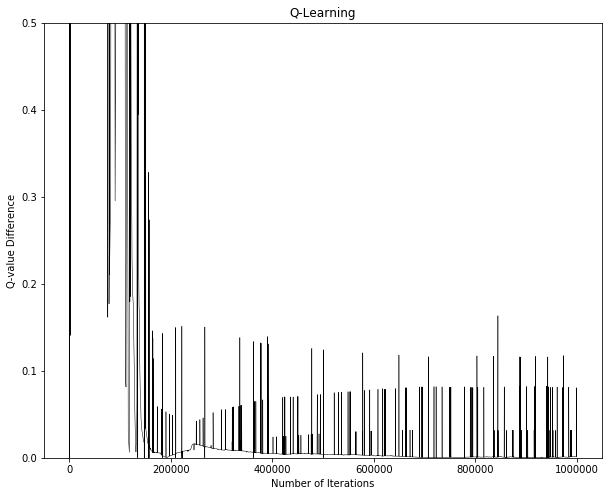

In [56]:
errr[0] = 1
plt.figure('Q-Learning')
plt.clf()
plt.title('Q-Learning')
plt.xlabel('Number of Iterations')
plt.ylabel('Q-value Difference')
plt.ylim(0, 0.5)
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(ind, errr, linestyle='-', color='black', linewidth=0.5)
plt.savefig('Qlearning.png')
